# OpenCV para el análisis de datos
## Carlos Adrián Palmieri Álvarez A01635776

In [4]:
import cv2

In [5]:
# -1, cv2.IMREAD_COLRO : Loads a color image. Any transparency of image will be neglected. It is the default flag.
# 0, cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
# 1, cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

image = cv2.imread('../../data/raw/opencv_images/2024-08-13.png', -1) # Change the path if is needed

In [6]:
#img = cv2.resize(image, (400,400))
#img = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = cv2.resize(image, (0,0), fx=0.25, fy=.25)
#cv2.imwrite('new_img_.png',img)

In [7]:
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Imágenes de prueba

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Cargamos imágenes

In [9]:
imagenes = ['../../data/raw/opencv_images/2024-08-13.png', 
            '../../data/raw/opencv_images/2024-08-14.png',
            '../../data/raw/opencv_images/2024-08-14_20-27.png',
            '../../data/raw/opencv_images/2024-08-15.png',]
indice_actual = 0

### Funciones para aplicar filtros

In [10]:
def binarizar_imagen(imagen):
    # Aplicar la binarización por histograma (Otsu)
    _, imagen_binarizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imagen_binarizada

In [11]:
def binarizar_imagen_gaussian(imagen):
    # Gaussian
    blur = cv2.GaussianBlur(imagen,(21,21), 0)
    # Aplicar la binarización por histograma (Otsu) a Gaussian
    _, imagen_binarizada = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imagen_binarizada

In [12]:
def dilate(imagen, kernel_size=(3, 3)):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.dilate(imagen, kernel, iterations=1)

In [13]:
def erode(imagen, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.erode(imagen, kernel, iterations=2)

In [14]:
def smooth(imagen, kernel_size=(5, 5)):
    return cv2.GaussianBlur(imagen, kernel_size, 5)

In [15]:
def opening(imagen, kernel_size=(11, 11)):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)

In [16]:
def close(imagen, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel)

In [17]:
def redimensionar_imagenes(imgs, width):
    resized_imgs = []
    for img in imgs:
        height = int((width / img.shape[1]) * img.shape[0])
        resized_imgs.append(cv2.resize(img, (width, height)))
    return resized_imgs

In [18]:
# Delete salt and pepper noise
def sp_noise(image):
    return cv2.medianBlur(image, 21)  # Use a 3x3 kernel

### Generación de imágenes con filtro para ventana

In [19]:
def mostrar_imagen(indice):
    img = cv2.imread(imagenes[indice], -1) 
    img_grey = cv2.imread(imagenes[indice], 0) 
    if img is None:
        print(f"No se pudo cargar la imagen en {imagenes[indice]}")
        return
    
    # Aplicar suavizado
    img_suavizada = smooth(img_grey)

    # Reduciendo ruido de salt and pepper
    img_sp = sp_noise(img_grey)

    # Binarizar las imágenes
    img_binarizada = binarizar_imagen(img_grey)
    img_binarizada_Gaus = binarizar_imagen_gaussian(img_grey)
    
    # Aplicar dilatación y erosión
    img_dilatada = dilate(img_grey) # Prueba con img_binarizada 
    img_erodida = erode(img_grey) # Prueba con img_binarizada

    # Aplicar apertura y cierre
    img_open = opening(img_grey)
    img_close = close(img_grey)

    global img_final 
    img_final = binarizar_imagen_gaussian(img_erodida)
    
    


    # Crear una lista con las imágenes
                #img_grey
    imgs = [img, img_sp, img_suavizada, img_binarizada, img_binarizada_Gaus, img_dilatada, img_erodida, img_open, img_close]


    # Obtener el ancho de la ventana
    window_width = 800  # Ajustar valor de la ventana

    # Redimensionar las imágenes para que se ajusten al ancho de la ventana
    resized_imgs = redimensionar_imagenes(imgs, window_width // 3)  # Ajustar para 3 columnas

    # Asegurarse de que hay suficientes imágenes
    while len(resized_imgs) < 9:
        resized_imgs.append(resized_imgs[-1])  # Añadir la última imagen si es necesario

    # Crear cuadrículas de imágenes en formato 3x3
    cuadrilla_fila1 = np.hstack(resized_imgs[0:3])  # Primera fila: 3 imágenes
    cuadrilla_fila2 = np.hstack(resized_imgs[3:6])  # Segunda fila: 3 imágenes
    cuadrilla_fila3 = np.hstack(resized_imgs[6:9])  # Tercera fila: 3 imágenes
    cuadrilla = np.vstack((cuadrilla_fila1, cuadrilla_fila2, cuadrilla_fila3))  # Apilar las filas



    # Mostrando el tipo de filtro que se está aplicando como etiqueta en la imagen en la ventana pero con un loop
    for i, txt in enumerate(['Original', 'Salt & Pepper', 'Smooth', 'Binary', 'Binary Gaussian', 'Dilate', 'Erode', 'Opening', 'Close']):
        if i<3:
            cv2.putText(cuadrilla, txt, (i*window_width//3 + 10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 128, 128), 1, cv2.LINE_AA)
        elif i<6:
            cv2.putText(cuadrilla, txt, ((i-3)*window_width//3 + 10, 220), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 128, 128), 1, cv2.LINE_AA)
        else:
            cv2.putText(cuadrilla, txt, ((i-6)*window_width//3 + 10, 420), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 128, 128), 1, cv2.LINE_AA)

    # Mostrar la cuadrícula
    cv2.imshow('Og, Gray, Smooth, Bin, BinGaus, Dilate, Erode, Opening, Close', cuadrilla)


### Generando ventana

In [20]:
while True:
    mostrar_imagen(indice_actual)
    
    # Esperar a que se presione una tecla   
    tecla = cv2.waitKey(0)

    # Si se presiona la tecla "Enter" se cambia a la siguiente imagen o si pasaron 2 segundos
    if tecla == 13:  # Tecla "Enter" o dos segundos sin presionar una tecla
        indice_actual = (indice_actual + 1) % len(imagenes)  # Cambiar a la siguiente imagen
    elif tecla == 27:  # Tecla "Esc" para salir
        break

    # Si se presiona la tecla "Enter" se cambia a la siguiente imagen o si pasaron 2 segundos
    
# Cerrar todas las ventanas
cv2.destroyAllWindows()

## Conclusión sobre imágenes

Al aplicar binarización por threshold sobre las imágenes se puede observar aún con mucho ruido, por lo que se aplicaron diferentes filtros para poder revisar si con combinaciones se podría reducir este, sin embargo, no se llegó a una combinación óptima con la combinación en las instrucciones de la actividad. Archivo llamado "FiltroInstrucciones.png"

Una de las mejores combinaciones para marcar los bordes es hacer un filtrado "opening" continuando con un filtrado de erosión, en esta imagen se puede apreciar cómo los bordes están marcados respecto a la imagen original y respecto al uso de los demás filtros; al utilizar filtro de opening sin un filtrado de erosión después, también presenta resultados bastante buenos. Archivo llamado "FiltroBuenaCombinación.png"

In [21]:
# Mostrando imagen final 
img_final = cv2.resize(img_final, (0,0), fx=0.25, fy=.25)
cv2.imshow('Imagen Final', img_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

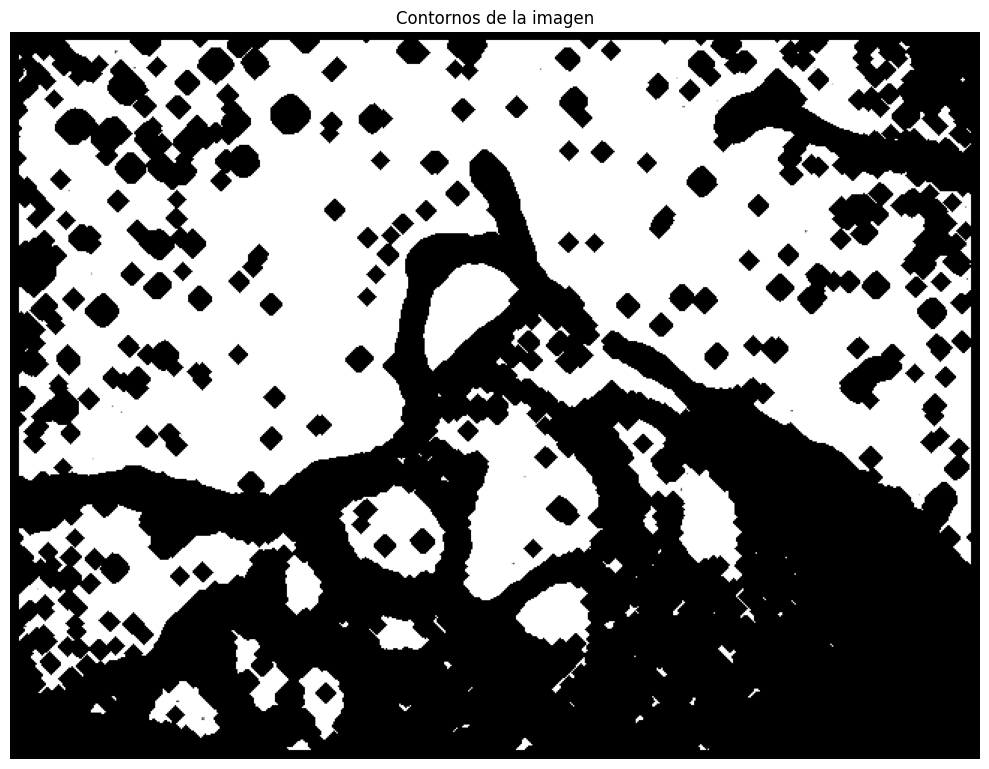

In [27]:
# Contornos de la imagen 
contours,_ = cv2.findContours(img_final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos
contornos_imagen = cv2.drawContours(img_final, contours, -1, (0, 255, 0), 3)

# Mostrar imagen con contornos
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contornos_imagen, cv2.COLOR_BGR2RGB))
plt.title('Contornos de la imagen')
plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
tamano_crop = []
for i, contours in enumerate(contours):
    mask = np.zeros_like(img_final)

    cv2.drawContours(mask, contours, -1, 255, -1)
    ob_ext = cv2.bitwise_and(img_final, img_final, mask=mask)

    x, y, w, h = cv2.boundingRect(contours)

    crop = ob_ext[y:y+h, x:x+w]    
    tamano_crop.append((x, y, w, h))

    

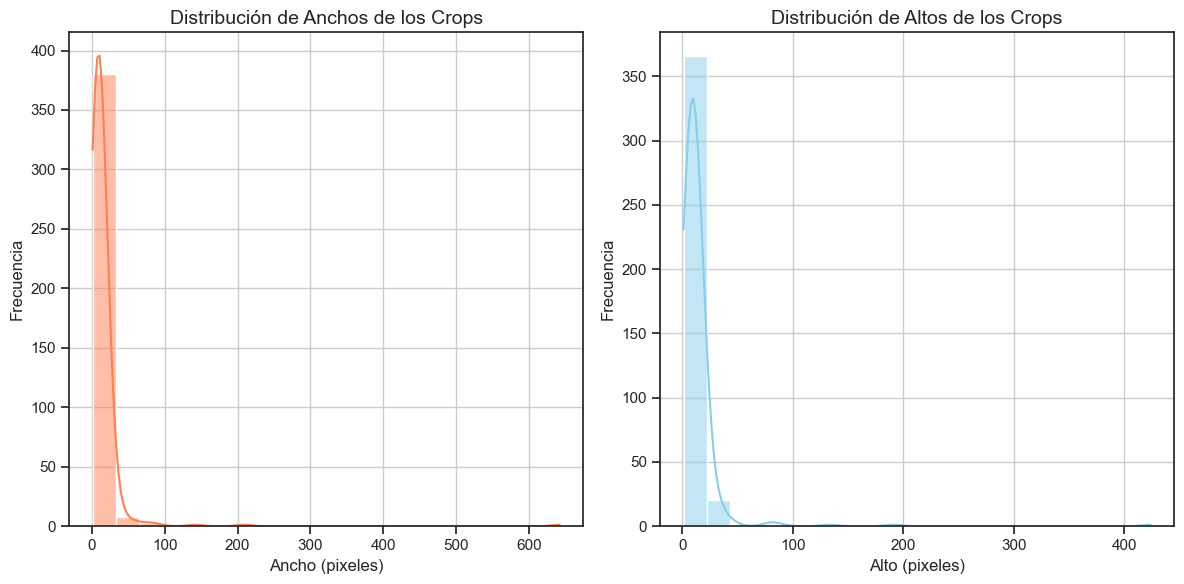

In [35]:
# Estilo de seaborn
sns.set(style="ticks")

# Extraer anchos y altos
anchos = [crop[2] for crop in tamano_crop]
altos = [crop[3] for crop in tamano_crop]

# Crear la figura
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(anchos, bins=20, color='coral', kde=True)
plt.title('Distribución de Anchos de los Crops', fontsize=14)
plt.xlabel('Ancho (pixeles)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(altos, bins=20, color='skyblue', kde=True)
plt.title('Distribución de Altos de los Crops', fontsize=14)
plt.xlabel('Alto (pixeles)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()
